**1.** Consider the Solow model with population growth. Suppose the production function is Cobb-Douglas with $\alpha=1/3$. 

**a)** Write capital stock per worker at time $t+1$ as a function of capital stock per worker at time $t$.

**b)** Suppose that investment rate is 20\%, $\gamma =.2$, depreciation rate is 5\%, $\delta=.05$, population growth rate is 1\%, $n=.01$, and $A=1$. Find steady state capital per worker and income per worker.

**c)** Suppose that initial capital stock per worker is equal to 5, $k_0=5$. Simulate the economy for 100 periods, and calculate capital per worker and output per worker for each time period. Plot your results. Does the economy converge to the steady state?

**d)** Repeat part c with initial capital stock per worker equal to 7, $k_0=7$. Compare your results with part c. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T = 100
alpha = 1/3
gamma = .2
delta = .05
n = .01
k_seq  = np.zeros(T)
y_seq  = np.zeros(T)
k_init = 5
k_seq[0]=k_init
y_seq[0]=k_init**alpha

$$k_{t+1}=\frac{\gamma k_t^\alpha + (1-\delta)k_t}{1+n}$$

$$ k^{ss} = \left(\frac{A\gamma}{\delta + n} \right)^{1/(1-\alpha)} $$

In [3]:
k_ss = (gamma/(delta+n))**(1/(1-alpha))
k_sseq = np.ones(T)*k_ss
y_ss = k_ss**alpha
y_sseq = np.ones(T)*y_ss
for t in range(1,T):
    k_seq[t]=(gamma*y_seq[t-1]+(1-delta)*k_seq[t-1])/(1+n)
    y_seq[t]=k_seq[t]**alpha

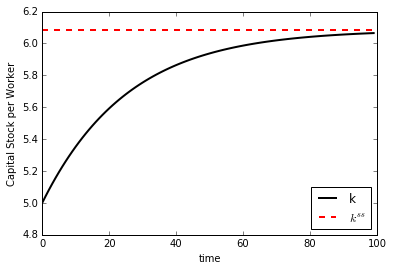

In [4]:
plt.plot(k_seq,'k',linewidth=2,label='k')
plt.plot(k_sseq,'r--',linewidth=2, label=r'$k^{ss}$')
plt.xlabel('time')
plt.ylabel('Capital Stock per Worker')
plt.legend(loc='best')
plt.savefig('q1_c-1.pdf')

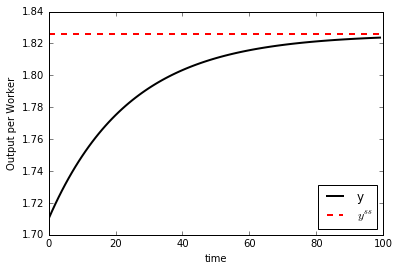

In [5]:
plt.plot(y_seq,'k',linewidth=2,label='y')
plt.plot(y_sseq,'r--',linewidth=2, label=r'$y^{ss}$')
plt.xlabel('time')
plt.ylabel('Output per Worker')
plt.legend(loc='best')
plt.savefig('q1_c-2.pdf')

In [6]:
k_seq[0]= 7
y_seq[0] = k_seq[0]**alpha
for t in range(1,T):
    k_seq[t]=(gamma*y_seq[t-1]+(1-delta)*k_seq[t-1])/(1+n)
    y_seq[t]=k_seq[t]**alpha

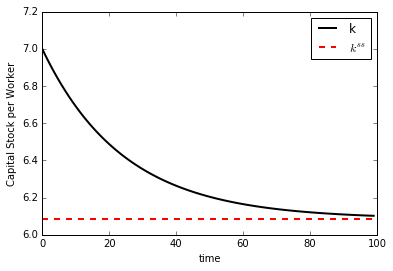

In [7]:
plt.plot(k_seq,'k',linewidth=2,label='k')
plt.plot(k_sseq,'r--',linewidth=2, label=r'$k^{ss}$')
plt.xlabel('time')
plt.ylabel('Capital Stock per Worker')
plt.legend(loc='best')
plt.savefig('q1_d-1.pdf')

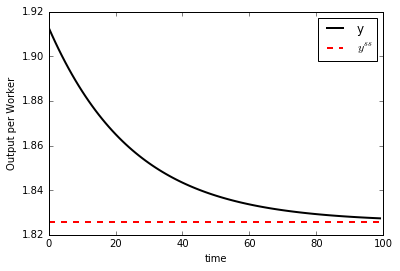

In [8]:
plt.plot(y_seq,'k',linewidth=2,label='y')
plt.plot(y_sseq,'r--',linewidth=2, label=r'$y^{ss}$')
plt.xlabel('time')
plt.ylabel('Output per Worker')
plt.legend(loc='best')
plt.savefig('q1_d-2.pdf')

**2.** Go to the following website:

https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2018

Download Maddison Project Database 2018 either in Excel or Stata format (you are free to use whichever software you are comfortable with). Pick the United Kingdom and 4 other countries: a country with less than \$5000 income per capita, a country with \$5000-\$10000 income per capita, a country with \$10000-\$20000 income per capita, and a country with more than \$20000 income per capita in 2016 (or in the latest available year). 

**a)** Plot income per capita of the UK and the other countries you picked over time (use all the years that data exists). The variable you need to plot is cgdppc (Real GDP per capita in 2011US\$, multiple benchmarks (suitable for cross-country income comparisons)). Briefly comment on the graph.

**b)** Now, calculate the growth rate of these countries using variable rgdpnapc (Real GDP per capita in 2011US\$, 2011 benchmark (suitable for cross-country growth comparisons)). Plot growth rates over time. Briefly comment on the graph.



In [9]:
data = pd.read_excel('mpd2018.xlsx',sheetname='Full data')

In [10]:
data=data.set_index(['countrycode','year'])

In [11]:
countries=['AFG','UKR','TUR','NOR','GBR']

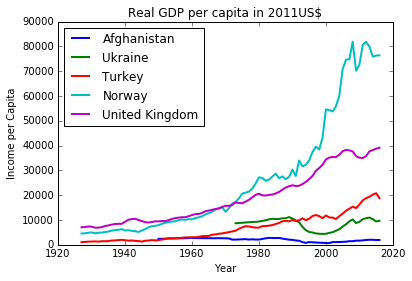

In [12]:
for country in countries:
    plt.plot(data.loc[country][-90:]['cgdppc'].dropna(),linewidth=2,label=data.loc[country,2016]['country'])
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Income per Capita')
plt.title('Real GDP per capita in 2011US$')
plt.savefig('q2-a.pdf')

**3.** Go to the following website:

https://www.rug.nl/ggdc/productivity/pwt/

Download Penn World Table version 9.0 database in your preferred format. Consider the countries you picked in question \#2. 

**a) **  Using data in the last available year, calculate real per capita income, real capital stock per capita, and human capital index for each of the countries you picked. Report your results. Report also the variables in the data set you used. 

**b) ** Assume a Cobb-Douglas production function with $\alpha=1/3$. Suppose countries differ only with respect to their investment rates. For each country you picked, calculate Solow model predicted income per capita relative to the UK income per capita. For investment rates of countries, use average of variable csh\_i (Share of gross capital formation at current PPPs) over the years 1975-2014. Generate a table comparing Solow model predicted income per capita relative to the UK with actual income per capita relative to the UK (in 2014, or in the latest available year) (Hint, I ask you to do an exercise same as Figure 3.7 in your textbook.). Briefly comment on the table.  

**c) ** Now, assume that countries differ with respect to investment rates and population growth rates. Calculate average population growth rates of countries you picked from 1975 to 2014. Repeat the exercise in part b. Create a table that compares Solow model predicted income differences with actual income differences relative to the UK. Briefly comment on the table.

**d) ** Now, assume that countries differ not only in their investment and population growth rates but also in their human capital. Calculate average human capital index of countries your picked from 1975 to 2014. For this exercise use variable hc (Human capital index, based on years of schooling and returns to education). Repeat part c while considering human capital differences across countries. Create a table and briefly comment on it.

**e) ** Do your predictions approach to actual income differences as you take into account more variables? 

 


In [13]:
data_q3 = pd.read_excel('pwt90.xlsx',sheetname='Data')

In [14]:
data_q3 = data_q3.set_index(['countrycode','year'])

The variables I used are 
* cgdpe : Expenditure-side real GDP at current PPPs (in mil. 2011US\$)
* pop   : Expenditure-side real GDP at current PPPs (in mil. 2011US\$)
* emp   : Number of persons engaged (in millions)
* ck    : Capital stock at current PPPs (in mil. 2011US\$)

I used both per worker and per capita variables. You are free to use either of them. 



In [15]:
data_q3_a = data_q3.xs(2014,level=1)
data_q3_a = data_q3_a.dropna(how='any',subset=['cgdpe','pop','emp','ck'])

In [16]:
data_q3_a['income per capita']  = data_q3_a['cgdpe']/data_q3_a['pop']
data_q3_a['income per worker']  = data_q3_a['cgdpe']/data_q3_a['emp']
data_q3_a['capital per capita'] = data_q3_a['ck']/data_q3_a['pop']
data_q3_a['capital per worker'] = data_q3_a['ck']/data_q3_a['emp']

In [17]:
data_q3_a[['country','income per capita','income per worker',
           'capital per capita', 'capital per worker','hc','cgdpe','ck','pop','emp']].to_csv('q3_a.csv')

In [18]:
data_q3['pop growth'] = data_q3.groupby(level=0)['pop'].pct_change()
data_q3_partial = data_q3.loc[(slice(None), slice(1975, 2014)), :]

In [19]:
def data_average(group):
    return group[['csh_i','delta','pop growth','hc']].mean()

In [20]:
# here by calling data_average function I calculate the average
# investment rate, population growth rate, human capital for each country
# from 1975 to 2014
data_q3_b = data_q3_partial.groupby(level=0).apply(data_average)

In [21]:
# assign values for alpha and delta
# you are free to use a fixed delta or the average delta you get from the data
alpha = 1/3
delta = .05
gbr_inv = data_q3_b.loc['GBR']['csh_i']
gbr_inv_pop = gbr_inv/(delta+data_q3_b.loc['GBR']['pop growth'])
gbr_hc = data_q3_b.loc['GBR']['hc']

In [22]:
# predictions for part b
data_q3_b['predict_b'] = (data_q3_b['csh_i']/gbr_inv)**(alpha/(1-alpha))
# predictions for part c
data_q3_b['predict_c'] = ((data_q3_b['csh_i']/(data_q3_b['pop growth']+delta))/gbr_inv_pop)**(alpha/(1-alpha))
# predictions for part d
data_q3_b['predict_d'] = data_q3_b['hc']/gbr_hc*data_q3_b['predict_c']

In [23]:
# now calculate the actual income per capita and income per worker differences
# you are free to use either of income per capita and income per worker
# though income per worker is a better comparison to the model predictions
data_q3_b['actual income diff (pop)'] =data_q3_a['income per capita']/data_q3_a.loc['GBR']['income per capita']
data_q3_b['actual income diff (emp)'] =data_q3_a['income per worker']/data_q3_a.loc['GBR']['income per worker']
data_q3_b=data_q3_b.dropna(how='any',subset=['predict_b','predict_c','predict_d'])

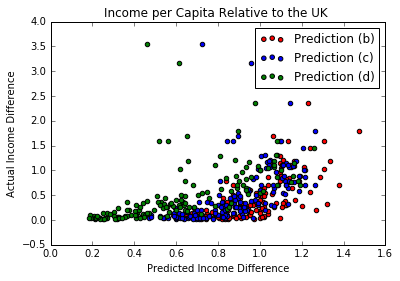

In [24]:
plt.scatter(data_q3_b['predict_b'],data_q3_b['actual income diff (pop)'],c='r',label='Prediction (b)')
plt.scatter(data_q3_b['predict_c'],data_q3_b['actual income diff (pop)'],c='b',label='Prediction (c)')
plt.scatter(data_q3_b['predict_d'],data_q3_b['actual income diff (pop)'],c='g',label='Prediction (d)')
plt.legend(loc='best')
plt.xlabel('Predicted Income Difference')
plt.ylabel('Actual Income Difference')
plt.title('Income per Capita Relative to the UK ')
plt.savefig('incomedif_pop.pdf')

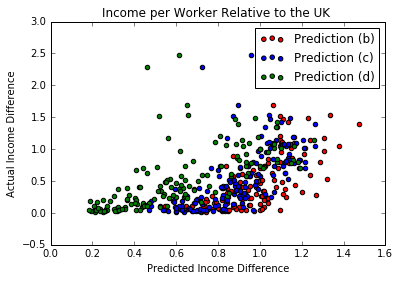

In [26]:
plt.scatter(data_q3_b['predict_b'],data_q3_b['actual income diff (emp)'],c='r',label='Prediction (b)')
plt.scatter(data_q3_b['predict_c'],data_q3_b['actual income diff (emp)'],c='b',label='Prediction (c)')
plt.scatter(data_q3_b['predict_d'],data_q3_b['actual income diff (emp)'],c='g',label='Prediction (d)')
plt.legend(loc='best')
plt.xlabel('Predicted Income Difference')
plt.ylabel('Actual Income Difference')
plt.title('Income per Worker Relative to the UK ')
plt.savefig('incomedif_emp.pdf')

In [156]:
data_q3_b.to_csv('q3_b_c_d.csv')